In [7]:
import torch

import MyTensor as MT
import Loss
import numpy as np

def test_gradient():

    x = torch.tensor(2.0, requires_grad=True)
    y = torch.tensor(3.0, requires_grad=True)
    
    mtx = MT.mytensor(np.array([2.0]))
    mty = MT.mytensor(np.array([3.0]))

    #print(mtx,mty)

    class Lf(Loss.loss):
        def __init__(self,comment=None):
            super().__init__(comment)
        def _loss(self, pred=None, label=None):
            temp1 = MT.dot(mtx,mtx)
            temp2 = MT.dot(mtx,mty)
            temp3 = MT.dot(mty,mty)
            return MT.add(temp1,MT.add(3*temp2,temp3))


    f = x**2 + 3 * x * y + y**2


    Lf1 = Lf()
    Lf1(None,None)
    Lf1.backward(mode='force')

    f.backward()

    print("MyTensor")
    print("Lf1", Lf1._tensorloss)
    print("x_grad", mtx._grad)
    print("y_grad", mty._grad)

    print("=======================================")
    print("Pytorch:")
    print("f =", f.item())
    print("Gradient of x (df/dx) =", x.grad.item())
    print("Gradient of y (df/dy) =", y.grad.item())

    print("=======================================")
    print("Expected(manually):")
    expected_grad_x = 2 * x.item() + 3 * y.item()
    expected_grad_y = 3 * x.item() + 2 * y.item()
    print("Expected df/dx =", expected_grad_x)
    print("Expected df/dy =", expected_grad_y)


    assert torch.isclose(torch.tensor(mtx._grad.npar_data), torch.tensor(expected_grad_x)), "x gradient mismatch"
    assert torch.isclose(torch.tensor(mty._grad.npar_data), torch.tensor(expected_grad_y)), "y gradient mismatch"
    print("Gradients match expected values!")

if __name__ == "__main__":
    test_gradient()


MyTensor
Lf1 tensor32(31.0)
x_grad tensor32([13.])
y_grad tensor32([12.])
Pytorch:
f = 31.0
Gradient of x (df/dx) = 13.0
Gradient of y (df/dy) = 12.0
Expected(manually):
Expected df/dx = 13.0
Expected df/dy = 12.0
Gradients match expected values!


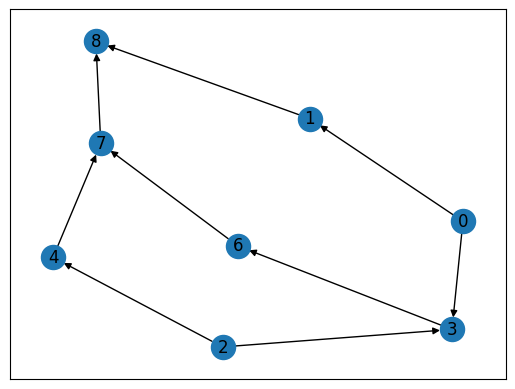

In [2]:
import networkx as nx
cg = MT.mytensor.computegraph
simple_DiG=nx.DiGraph()
for i in cg._edgelist:
    simple_DiG.add_edge(i['from'],i['to'])
nx.draw_networkx(simple_DiG,pos=nx.spring_layout(simple_DiG))

In [3]:
counter=0
for i in cg._nodelist:
    print(counter)
    counter+=1
    if type(i).__name__ == 'mytensor' or type(i).__name__ == 'mytensorloss' or type(i).__name__ == 'myparameter':
        print(i.__dict__)
        print('==================================')
    else:
        print(i)
        print('==================================')

0
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [1, 1, 3], '_cg_ascend': [], '_grad_f': tensor32([13.]), 'grad': tensor32([13.]), 'npar_data': array([2.], dtype=float32), 'shape': (1,)}
1
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [8], '_cg_ascend': [0, 0], '_grad_f': tensor32(1.0), 'grad': tensor32(1.0), 'npar_data': array(4., dtype=float32), 'shape': ()}
2
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [3, 4, 4], '_cg_ascend': [], '_grad_f': tensor32([12.]), 'grad': tensor32([12.]), 'npar_data': array([3.], dtype=float32), 'shape': (1,)}
3
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [6], '_cg_ascend': [0, 2], '_grad_f': tensor32(3.0), 'grad': tensor32(3.0), 'npar_data': array(6., dtype=float32), 'shape': ()}
4
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [7], '_cg_ascend': [2, 2], '_grad_f': tensor32(1.0), 'grad': tensor32(1.0), 'npar_data': array(9., dtype=float32), 'shape': ()}
5
3
6
{'tensortype': 'ten